In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [91]:
file = '/Volumes/RTO/C Brace/Actigraph/Data/Home/CBR 26/Merged/CBR26_home_KAFO_device_10sec AGD Details Epochs 2021-02-25_12-31-58.csv'
D = pd.read_csv(file,skiprows=1)

In [92]:
D = D[D.date=='5/30/2016'].copy()
D.head()

,date,epoch,axis1,axis2,axis3,vm,steps,lux,inclinometer off,inclinometer standing,inclinometer sitting,inclinometer lying
135174,5/30/2016,7:52:00 AM,0,0,0,0,0,0,10,0,0,0
135175,5/30/2016,7:52:10 AM,0,0,0,0,0,0,10,0,0,0
135176,5/30/2016,7:52:20 AM,0,0,0,0,0,0,10,0,0,0
135177,5/30/2016,7:52:30 AM,0,0,0,0,0,0,10,0,0,0
135178,5/30/2016,7:52:40 AM,0,0,0,0,0,0,10,0,0,0


In [94]:
D.reset_index(inplace=True,drop=True)

# Add points to pad beginning and end of accel plot with zeros

start = D.iloc[[0],:].copy()
start.iloc[:,2:] = 0
start.epoch = '12:00:00 AM'
start.index += -1

preEnd = D.iloc[[-1],:].copy()
preEnd.iloc[:,2:] = 0
preEnd.epoch = '10:33:50 PM'
preEnd.index += 1

end = D.iloc[[-1],:].copy()
end.iloc[:,2:] = 0
end.epoch = '11:59:50 PM'
end.index += 2

D = pd.concat([start,D,preEnd,end])

In [95]:
D.epoch = pd.to_datetime(D.epoch)
D.epoch = D.epoch-pd.to_datetime('00:00:00')
D.epoch = D.epoch.astype('timedelta64[s]')

In [144]:
GPS = pd.read_excel('/Volumes/RTO/C Brace/GPS Analysis/UIC_GPSData/CBR26_Final_Summary_File.xlsx',
                    sheet_name='Baseline')
GPS = GPS[GPS['Date']=='2016-05-30']

GPS.BeginTime = pd.to_datetime(GPS.BeginTime)
GPS.BeginTime = GPS.BeginTime-pd.to_datetime('00:00:00')
GPS.BeginTime = GPS.BeginTime.astype('timedelta64[s]')

GPS.EndTime = pd.to_datetime(GPS.EndTime)
GPS.EndTime = GPS.EndTime-pd.to_datetime('00:00:00')
GPS.EndTime = GPS.EndTime.astype('timedelta64[s]')

Text(0, 0.5, 'Accel Counts')

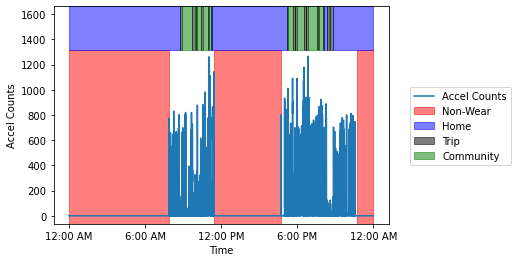

In [169]:
Plot = sn.lineplot(data=D,x='epoch',y='vm',ci=None, label = 'Accel Counts')

ax = Plot.axes

ylim = ax.get_ylim()
ax.set_ylim((ylim[0],ylim[1]*1.25))

# mark non-wear periods
ax.axvspan(0,7*3600+52*60-10,color='r',alpha=.5,ymax=.8)
ax.axvspan(11*3600+27*60,16*3600+44*60-10,color='r',alpha=.5,ymax=.8)
NonWear = ax.axvspan(22*3600+44*60,24*3600-10,color='r',alpha=.5,ymax=.8)

# mark locations
col = ['b','k','g']
for row in GPS.iterrows():
    row = row[1]
    
    start = row.BeginTime
    end = row.EndTime
    
    if row.LandUse=='home':
        col = 'b'
        Home = ax.axvspan(start,end,color=col,alpha=.5,ymin=.8)
    elif row.LandUse=='trip':
        col = 'k'
        Trip = ax.axvspan(start,end,color=col,alpha=.5,ymin=.8)
    else:
        col = 'g'
        Com = ax.axvspan(start,end,color=col,alpha=.5,ymin=.8)

ax.set_xticks([0,3600*6,3600*12,3600*18,3600*24])
ax.set_xticklabels(['12:00 AM','6:00 AM','12:00 PM','6:00 PM','12:00 AM']);

Accel = ax.get_legend_handles_labels()[0]

plt.legend((Accel[0],NonWear,Home,Trip,Com),('Accel Counts','Non-Wear','Home','Trip','Community'),
          bbox_to_anchor=(1.05,.65))

plt.xlabel('Time')
plt.ylabel('Accel Counts')

In [164]:
Accel[0]

In [159]:
ax.get_legend_handles_labels()

([<matplotlib.lines.Line2D at 0x7f9c0d13af60>], ['Accel Counts'])

In [124]:
GPS = GPS[GPS['LOCAL DATE']=='5/30/2016']

In [125]:
GPS['Cluster'].value_counts()

 1     6492
 2      795
-1      585
 5      321
 8      191
 3       88
 16      55
 15      23
 11      19
 19       5
 4        3
 17       1
Name: Cluster, dtype: int64

In [133]:
GPS[GPS['Cluster'].diff()!=0]

,Unnamed: 0,Unnamed: 0.1,INDEX,TRACK ID,VALID,UTC DATE,UTC TIME,LOCAL DATE,LOCAL TIME,MS,...,LONGITUDE,E/W,ALTITUDE,SPEED,HEADING,G-X,G-Y,G-Z,Wear/Non-Wear,Cluster
208065,208065,208065,88923,3,FIXED,5/30/2016,6:00:06,5/30/2016,0:00:06,0,...,-88.164487,W,218.323837,0.090460,353.610178,0,0,0,Non-Wear,1
210849,210849,210849,91707,3,FIXED,5/30/2016,13:44:06,5/30/2016,7:44:06,0,...,-88.162395,W,206.071762,27.538582,135.777210,0,0,0,Wear,-1
210851,210851,210851,91709,3,FIXED,5/30/2016,13:44:26,5/30/2016,7:44:26,0,...,-88.161857,W,204.795334,5.189348,186.793332,0,0,0,Wear,15
210856,210856,210856,91714,3,FIXED,5/30/2016,13:45:16,5/30/2016,7:45:16,0,...,-88.160477,W,203.444870,53.595436,89.325561,0,0,0,Wear,-1
210861,210861,210861,91719,3,FIXED,5/30/2016,13:46:06,5/30/2016,7:46:06,0,...,-88.150362,W,212.553101,26.913713,52.098189,0,0,0,Wear,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215133,215133,215133,95991,3,FIXED,5/31/2016,1:48:24,5/30/2016,19:48:24,0,...,-88.150742,W,214.928604,61.045052,269.194793,0,0,0,Wear,11
215134,215134,215134,95992,3,FIXED,5/31/2016,1:48:34,5/30/2016,19:48:34,0,...,-88.152766,W,213.611221,58.552246,269.477997,0,0,0,Wear,-1
215139,215139,215139,95997,3,FIXED,5/31/2016,1:49:24,5/30/2016,19:49:24,0,...,-88.161569,W,213.039078,35.268871,332.086733,0,0,0,Wear,15
215141,215141,215141,95999,3,FIXED,5/31/2016,1:49:44,5/30/2016,19:49:44,0,...,-88.162113,W,205.124527,35.643333,251.076940,0,0,0,Wear,-1


In [123]:
GPS['LOCAL DATE'].unique()

array(['5/5/2016', '5/6/2016', '5/7/2016', '5/8/2016', '5/9/2016',
       '5/10/2016', '5/11/2016', '5/12/2016', '5/13/2016', '5/14/2016',
       '5/15/2016', '5/16/2016', '5/17/2016', '5/18/2016', '5/19/2016',
       '5/20/2016', '5/21/2016', '5/22/2016', '5/23/2016', '5/24/2016',
       '5/25/2016', '5/26/2016', '5/27/2016', '5/28/2016', '5/29/2016',
       '5/30/2016', '5/31/2016', '6/1/2016', '6/2/2016', '6/3/2016',
       '6/4/2016', '6/5/2016', '6/6/2016', '6/7/2016'], dtype=object)

In [127]:
GPS.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'INDEX', 'TRACK ID', 'VALID', 'UTC DATE',
       'UTC TIME', 'LOCAL DATE', 'LOCAL TIME', 'MS', 'LATITUDE', 'N/S',
       'LONGITUDE', 'E/W', 'ALTITUDE', 'SPEED', 'HEADING', 'G-X', 'G-Y', 'G-Z',
       'Wear/Non-Wear', 'Cluster'],
      dtype='object')